In [1]:
import data_utils

folder_path = 'Datasets/hair-seg.v6i.coco-segmentation/train'

hair_dataset = data_utils.HairDataset(folder_path)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


In [2]:
image, target = hair_dataset[1]

print(image)
print(target)
print(target['masks'].shape)

tensor([[[0.9412, 0.9216, 0.8667,  ..., 0.1529, 0.1608, 0.1647],
         [0.9255, 0.8941, 0.8314,  ..., 0.1647, 0.1686, 0.1725],
         [0.9020, 0.8549, 0.7725,  ..., 0.1765, 0.1843, 0.1843],
         ...,
         [0.0706, 0.0706, 0.0745,  ..., 0.0667, 0.0627, 0.0627],
         [0.0745, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         [0.0784, 0.0745, 0.0745,  ..., 0.0745, 0.0706, 0.0745]],

        [[0.8157, 0.7961, 0.7490,  ..., 0.1020, 0.1098, 0.1137],
         [0.8000, 0.7686, 0.7137,  ..., 0.1059, 0.1098, 0.1137],
         [0.7765, 0.7294, 0.6549,  ..., 0.1216, 0.1255, 0.1255],
         ...,
         [0.1843, 0.1843, 0.1882,  ..., 0.1647, 0.1608, 0.1608],
         [0.1882, 0.1882, 0.1882,  ..., 0.1608, 0.1686, 0.1686],
         [0.1922, 0.1882, 0.1882,  ..., 0.1647, 0.1686, 0.1725]],

        [[0.6667, 0.6471, 0.6078,  ..., 0.0706, 0.0863, 0.0902],
         [0.6510, 0.6196, 0.5725,  ..., 0.0784, 0.0902, 0.0941],
         [0.6275, 0.5804, 0.5059,  ..., 0.0863, 0.0980, 0.

/home/ibs/Desktop/Machine_Learning/Hair-Detection/data_utils.py:63: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  target['masks'] = torch.tensor(target['masks']).to(device)


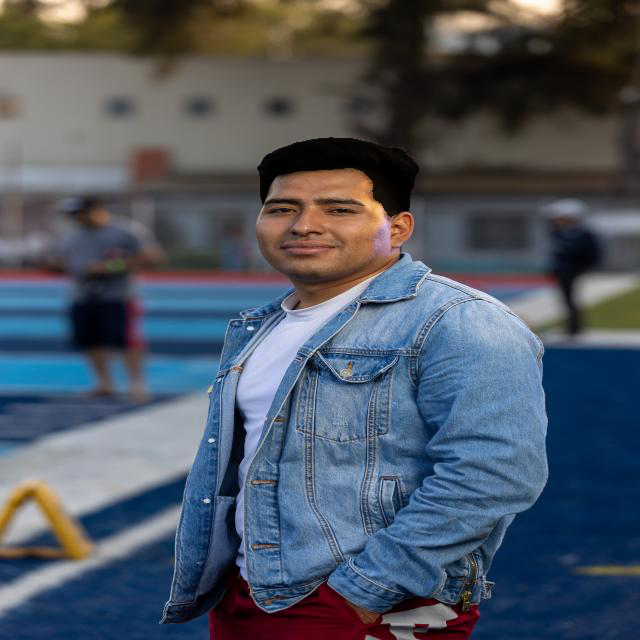

In [3]:
from visual_utils import draw_masks_on_image

draw_masks_on_image(image, target['masks'].to('cpu'))

In [4]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

num_classes = 2

model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels

hidden_layer_size = 256

model.roi_heads.mask_predictor = MaskRCNNPredictor(
    in_features_mask,
    hidden_layer_size,
    num_classes
)

In [5]:
from torch.utils.data import DataLoader

hair_dataloader = DataLoader(
    hair_dataset,
    batch_size = 2,
    collate_fn=lambda batch: tuple(zip(*batch))
)

images, targets = next(iter(hair_dataloader))

In [6]:
model.eval()

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

predictions = model(images)

In [7]:
predictions

[{'boxes': tensor([[6.9079e+01, 3.6546e+02, 4.7816e+02, 6.4000e+02],
          [1.4214e+02, 2.9988e+02, 6.3026e+02, 6.4000e+02],
          [2.5789e+02, 2.6922e+02, 4.7491e+02, 6.2482e+02],
          [1.6843e+02, 3.2505e+02, 5.9500e+02, 5.1405e+02],
          [1.8868e+02, 4.5050e+02, 3.7160e+02, 6.1605e+02],
          [1.4294e+02, 2.1386e+02, 2.6305e+02, 2.3650e+02],
          [0.0000e+00, 1.9018e+02, 7.1173e+01, 2.3025e+02],
          [1.0796e+02, 4.3592e+02, 4.2866e+02, 6.0228e+02],
          [0.0000e+00, 1.7220e+02, 5.7978e+01, 2.2117e+02],
          [0.0000e+00, 4.8706e+02, 6.4000e+02, 6.4000e+02],
          [1.4812e+02, 2.2089e+02, 2.6614e+02, 2.5086e+02],
          [1.8571e+02, 2.1930e+02, 2.5907e+02, 2.3280e+02],
          [9.8356e+01, 1.8396e+02, 4.8984e+02, 5.8167e+02],
          [0.0000e+00, 1.7704e+02, 8.5239e+00, 1.8958e+02],
          [2.5207e+01, 1.7600e+02, 7.2284e+01, 2.4075e+02],
          [1.0353e+01, 1.8403e+02, 1.0524e+02, 2.3601e+02],
          [2.3951e+02, 1.1298e+

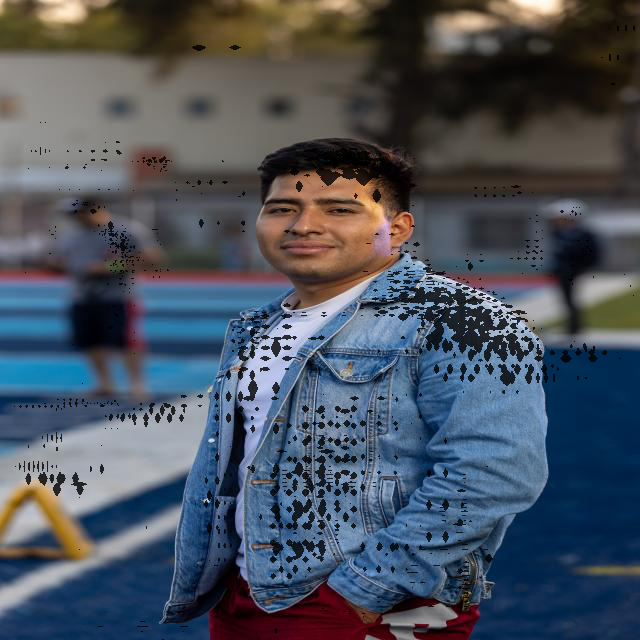

In [8]:
draw_masks_on_image(images[1].to('cpu'), predictions[1]['masks'].to('cpu'))

In [9]:
import torch

from training_loop import train

model.to(device)

train(model, hair_dataloader, epochs=1)

2024-09-18 15:38:52.888887: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-18 15:38:53.535909: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch: 0, batch index: 0, learning rate: [0.01], loss:6.905421733856201
Epoch: 0, batch index: 1, learning rate: [0.01], loss:2.7064826488494873
Epoch: 0, batch index: 2, learning rate: [0.01], loss:2.565361976623535
Epoch: 0, batch index: 3, learning rate: [0.01], loss:1.3698424100875854
Epoch: 0, batch index: 4, learning rate: [0.01], loss:1.6027085781097412
Epoch: 0, batch index: 5, learning rate: [0.01], loss:1.4723109006881714
Epoch: 0, batch index: 6, learning rate: [0.01], loss:1.7788848876953125
Epoch: 0, batch index: 7, learning rate: [0.01], loss:1.2789329290390015
Epoch: 0, batch index: 8, learning rate: [0.01], loss:0.9995933771133423
Epoch: 0, batch index: 9, learning rate: [0.01], loss:1.0181751251220703
Epoch: 0, batch index: 10, learning rate: [0.01], loss:0.7563932538032532
Epoch: 0, batch index: 11, learning rate: [0.01], loss:0.7251424789428711
Epoch: 0, batch index: 12, learning rate: [0.01], loss:0.8874765634536743
Epoch: 0, batch index: 13, learning rate: [0.01], 

In [10]:
state_dict = torch.load('My Model.pt')

model.load_state_dict(state_dict)

<All keys matched successfully>

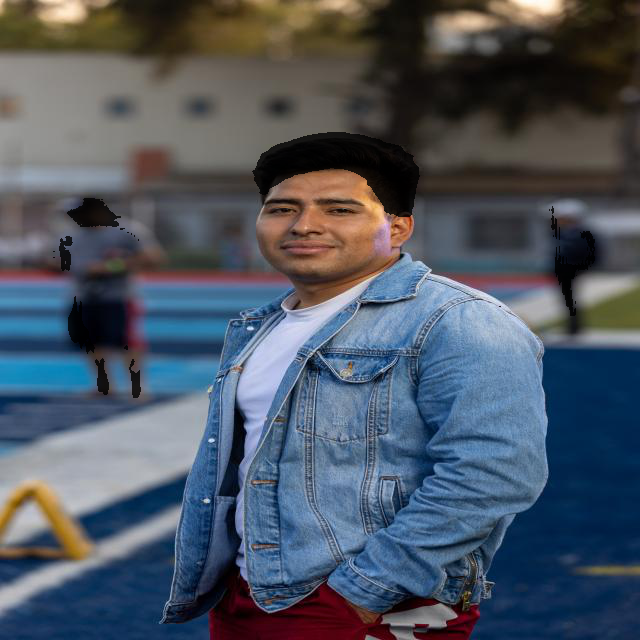

In [12]:
model.to(device)

model.eval()

predictions = model(images)

draw_masks_on_image(images[1].to('cpu'), predictions[1]['masks'].to('cpu'))